# **1.Further data analysis**

PCA and multicolinearity

In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Warsaw_Real_Estate/PREPROCESSED_DATA/Preprocesed_data.csv'

data = pd.read_csv(file_path)

print(data.head())


   squareMeters  rooms  floor  floorCount  buildYear  centreDistance  \
0         64.90      3      3          10       1979            8.41   
1         62.20      4      4           4       1981           10.31   
2         77.00      3      4           9       2007            6.71   
3         73.40      3      6          10       2007            5.68   
4         50.33      2      2           4       1958            2.41   

   schoolDistance  clinicDistance  postOfficeDistance  kindergartenDistance  \
0           0.301           0.264               0.259                 0.249   
1           0.348           3.661               0.377                 0.117   
2           0.264           0.136               0.041                 0.319   
3           0.300           0.749               0.282                 0.188   
4           0.333           0.063               0.178                 0.328   

   ...  district_Srodmiescie  district_Targowek  district_Ursus  \
0  ...                 Fa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vif analysis

In [3]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

vif_data = pd.DataFrame()
vif_data['Feature'] = data_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(data_scaled.values, i) for i in range(data_scaled.shape[1])]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                 Feature       VIF
0           squareMeters  2.895420
1                  rooms  2.846731
2                  floor  1.384253
3             floorCount  1.554353
4              buildYear  1.624567
5         centreDistance  3.874546
6         schoolDistance  1.862129
7         clinicDistance  2.887990
8     postOfficeDistance  1.791000
9   kindergartenDistance  1.635992
10    restaurantDistance  2.211252
11       collegeDistance  2.345886
12      pharmacyDistance  2.359258
13                  year       inf
14              month_01       inf
15              month_02       inf
16              month_03       inf
17              month_04       inf
18              month_05       inf
19              month_06       inf
20              month_07       NaN
21              month_08       inf
22              month_09       inf
23              month_10       inf
24              month_11       inf
25              month_12       inf
26        Train_distance  1.876605
27        Metro_dist

<ipython-input-4-76afd2cc76fa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data_sorted, palette="viridis")


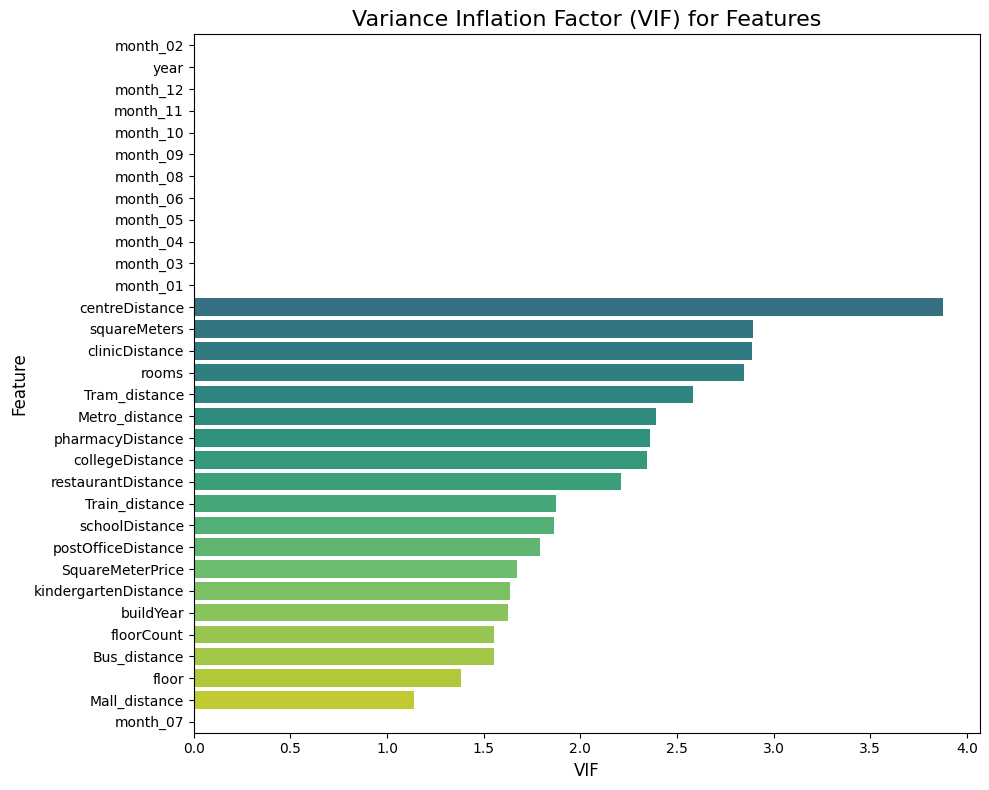

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="VIF", y="Feature", data=vif_data_sorted, palette="viridis")
plt.title("Variance Inflation Factor (VIF) for Features", fontsize=16)
plt.xlabel("VIF", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


No feature is above 5, which means that multicolinearity is not a problem.

centreDistance          1.000000
Tram_distance           0.670367
collegeDistance         0.573220
clinicDistance          0.551655
Metro_distance          0.551522
Train_distance          0.499508
buildYear               0.478131
restaurantDistance      0.424693
schoolDistance          0.422766
pharmacyDistance        0.380022
postOfficeDistance      0.323653
Bus_distance            0.297614
Mall_distance           0.257737
kindergartenDistance    0.231547
squareMeters            0.148274
rooms                   0.144647
month_09                0.008156
month_10                0.007824
month_11                0.006366
month_08                0.004752
month_05                0.002876
month_04                0.001326
month_03               -0.000011
month_02               -0.006382
month_06               -0.007190
month_12               -0.008244
month_01               -0.009337
year                   -0.010612
floor                  -0.105227
floorCount             -0.202930
SquareMete

<ipython-input-6-0994318b813a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=centre_distance_corr.values, y=centre_distance_corr.index, palette='viridis')


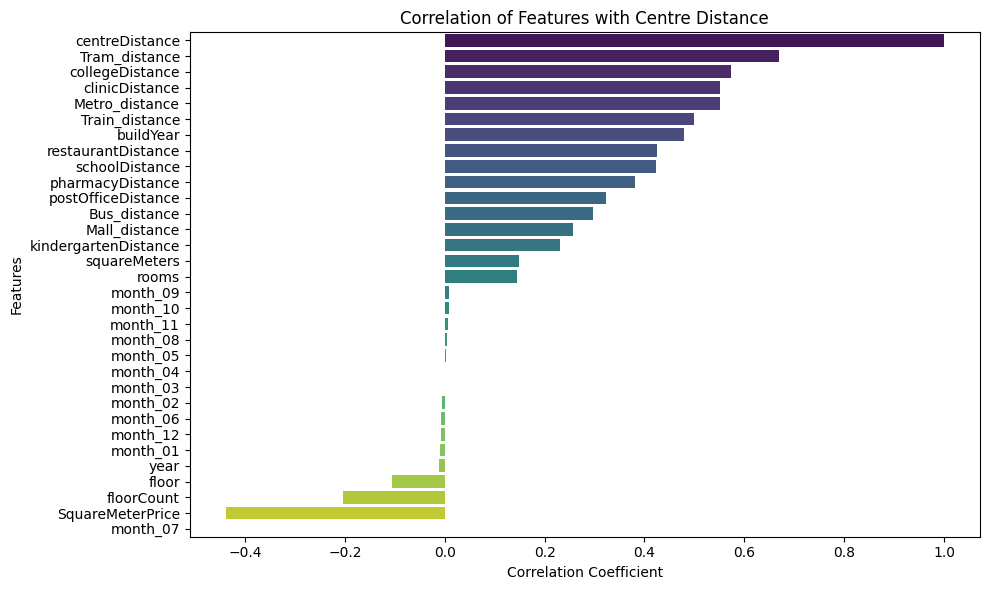

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = data.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_columns.corr()


centre_distance_corr = correlation_matrix['centreDistance'].sort_values(ascending=False)

print(centre_distance_corr)

plt.figure(figsize=(10, 6))
sns.barplot(x=centre_distance_corr.values, y=centre_distance_corr.index, palette='viridis')
plt.title('Correlation of Features with Centre Distance')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


While overall corealtion of features is not very high, corelation beetween distances is. We should consider making Primary components anlysis(PCA), to check it further

PCA

We are creating five automatic Principal components. Thanks to that we can see patterns in data similarity captured by algorithm

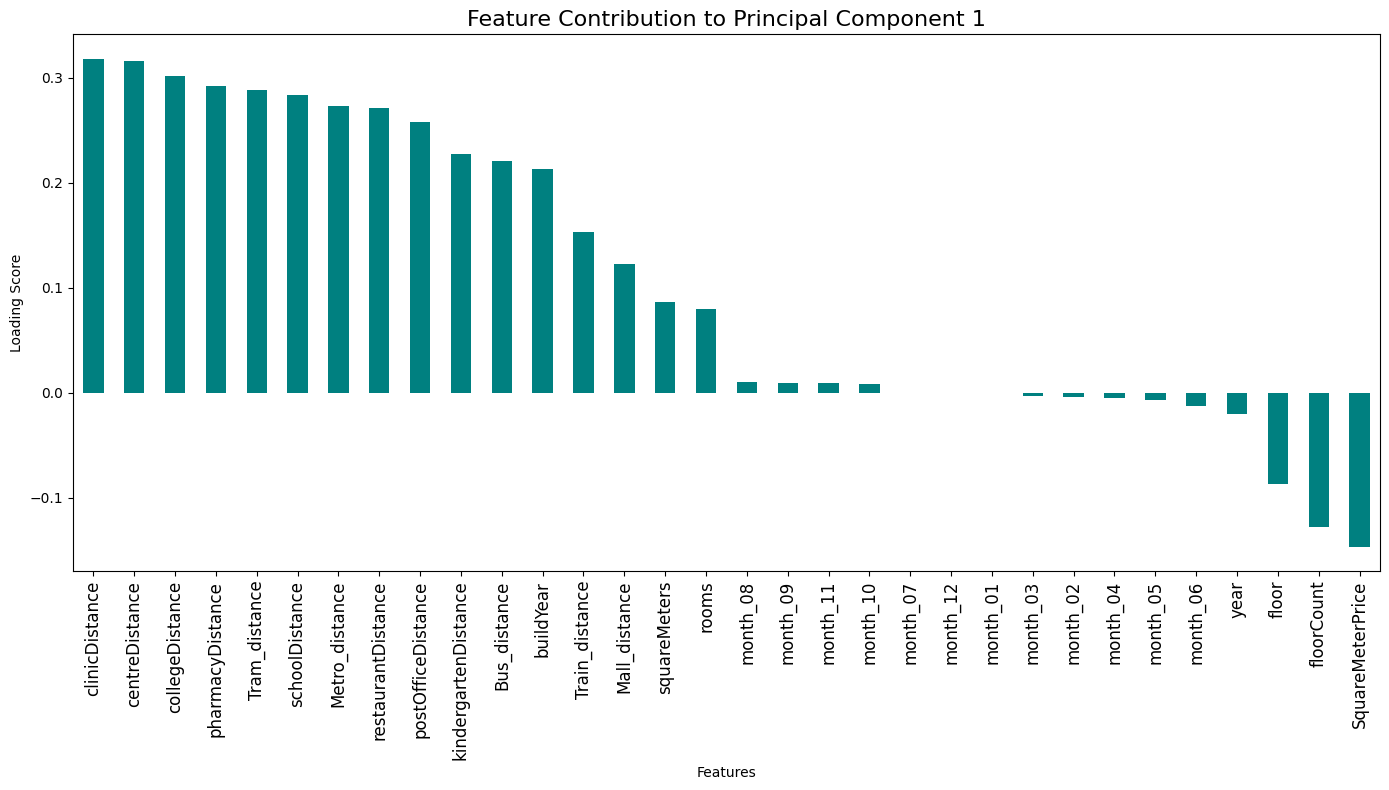

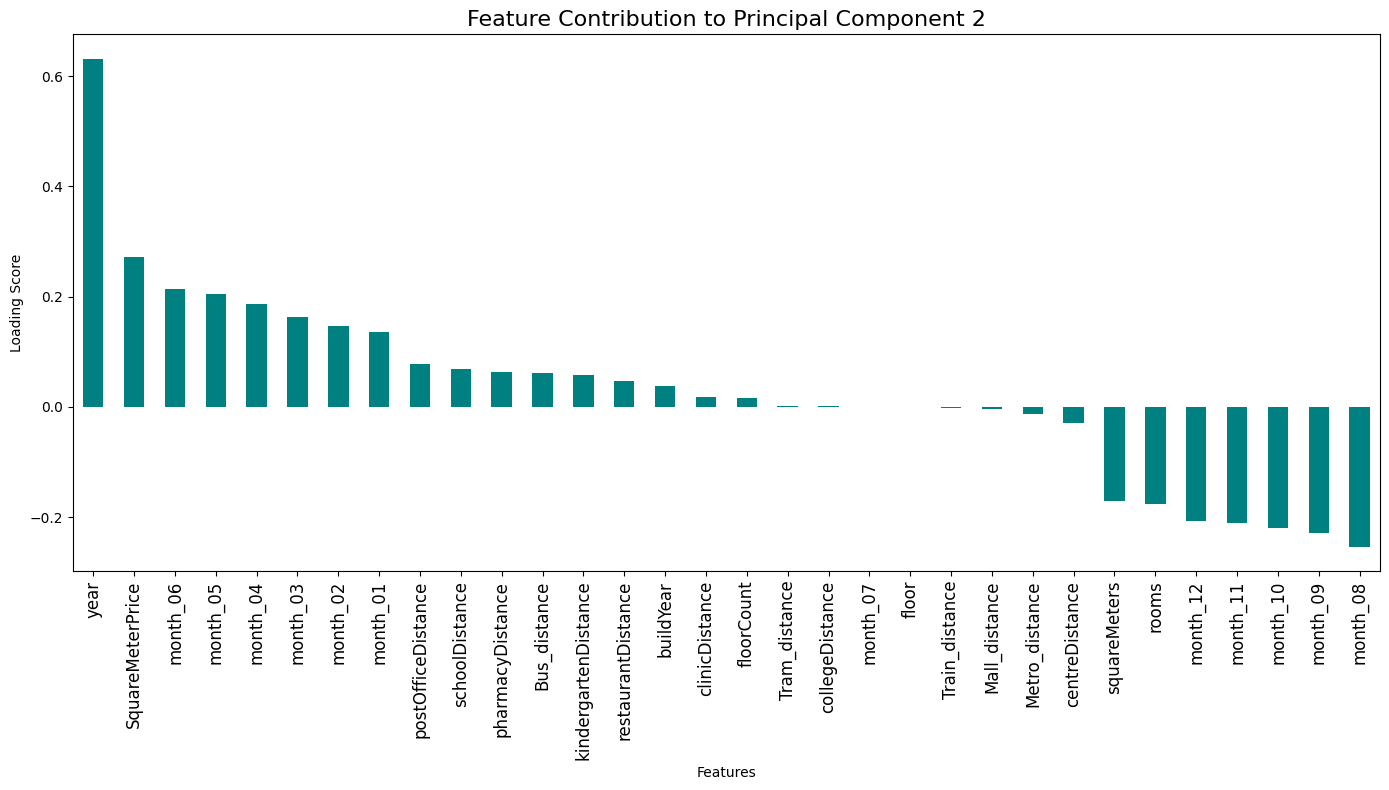

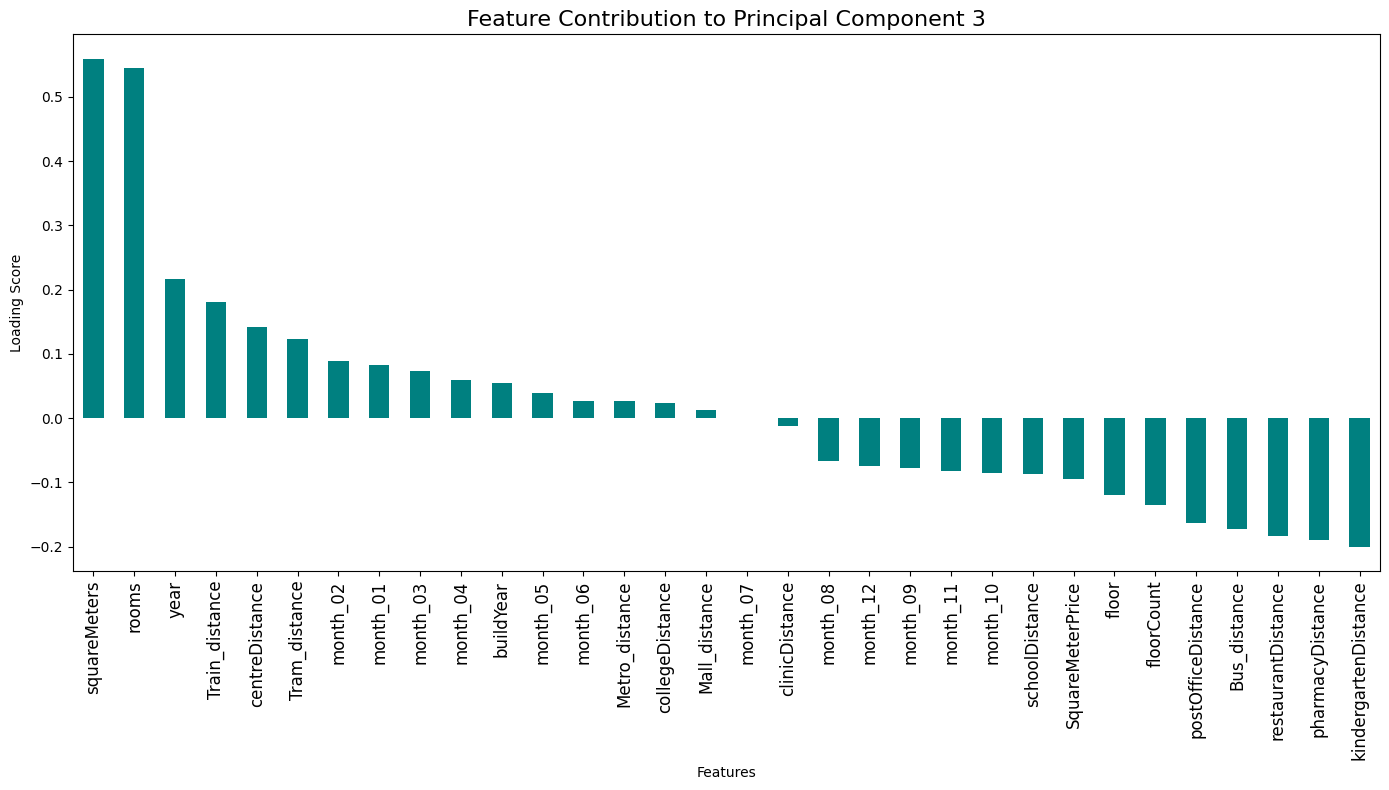

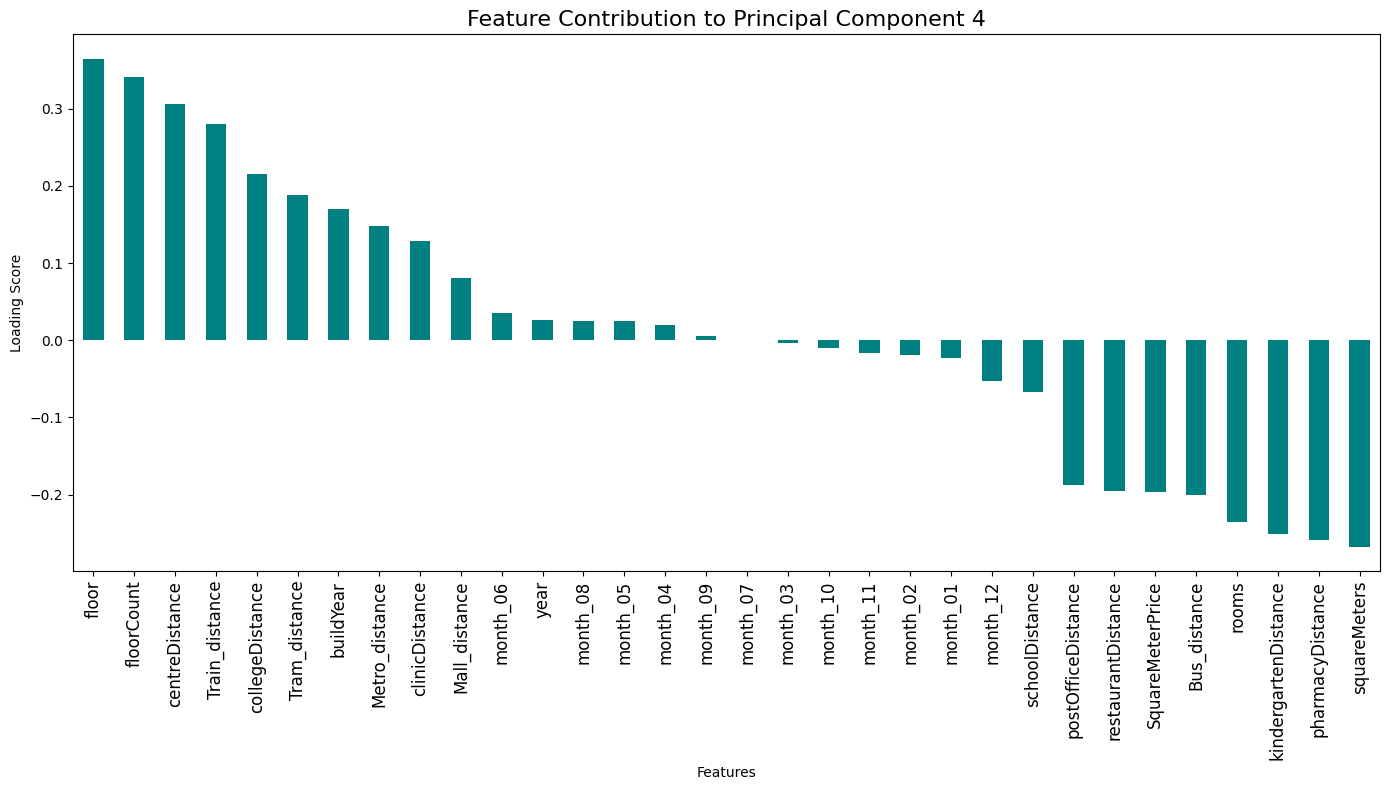

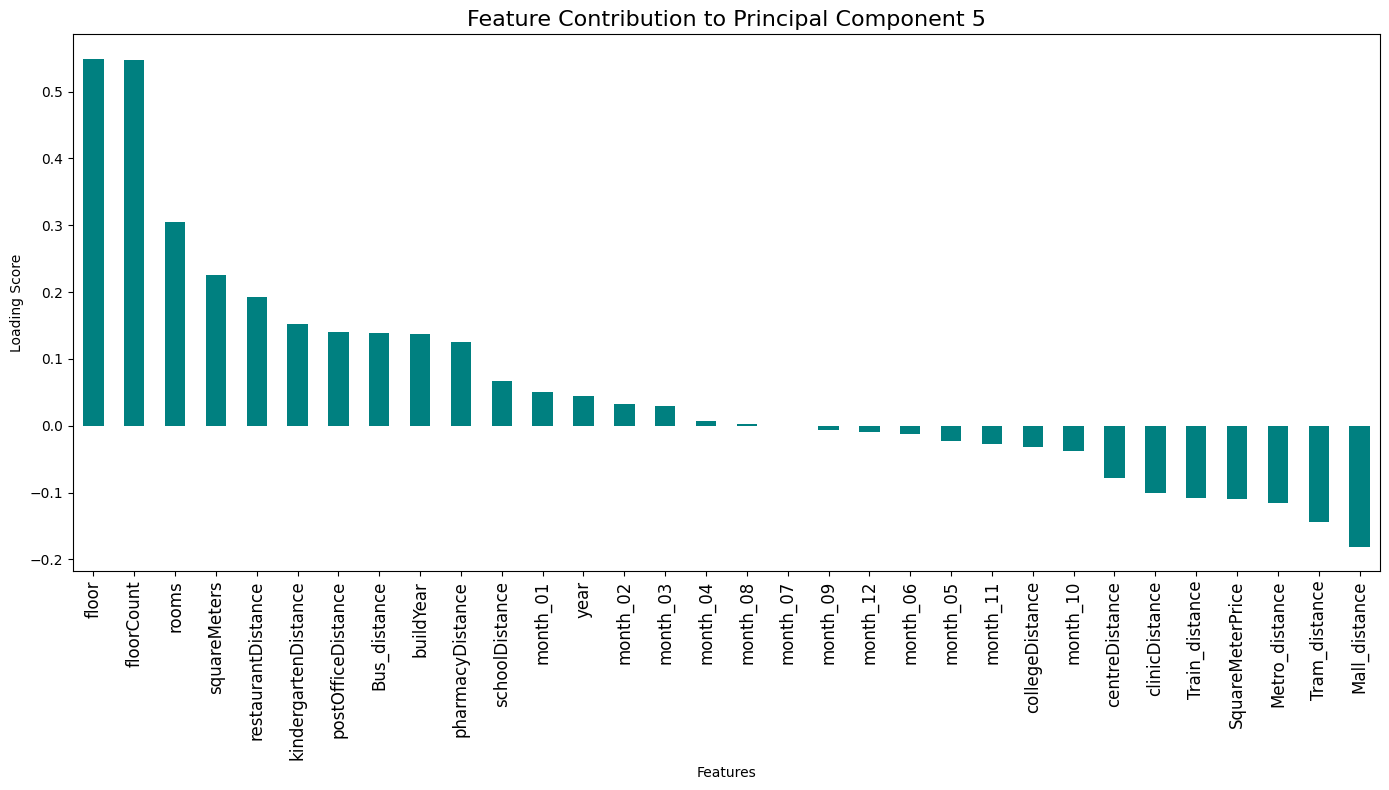

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_columns])
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
loading_data = pd.DataFrame(pca.components_, columns=numerical_columns)


for i in range(5):
    plt.figure(figsize=(14, 8))
    loading_data.iloc[i].sort_values(ascending=False).plot(kind='bar', color='teal')
    plt.title(f'Feature Contribution to Principal Component {i+1}', fontsize=16)
    plt.ylabel('Loading Score')
    plt.xlabel('Features')
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()


All distance columns contribute relatively evenly to the first principal component (PC1), and are correaltie, which means we can merge this columns into one PC, thanks to that we will make our dataset smaller, without loosing information. This will also speed up training of our model.

We will add PC making as a layer of our model

# 2.Model building and Training

We will use XGBoost model. It is decision tree model. Perfect for data like ours, where dependencies are non linear and a lot of categorical columns occures.

In [8]:
distance_columns = [
    'centreDistance', 'schoolDistance', 'clinicDistance', 'postOfficeDistance',
    'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
    'pharmacyDistance', 'Train_distance', 'Metro_distance',
    'Tram_distance', 'Bus_distance', 'Mall_distance'
]
non_distance_columns = [
    'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'hasParkingSpace',
    'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom', 'year',
    'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06',
    'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12',
    'SquareMeterPrice', 'type_apartmentBuilding', 'type_blockOfFlats',
    'type_tenement', 'condition_low', 'condition_normal', 'condition_premium',
    'ownership_condominium', 'ownership_cooperative', 'buildingMaterial_UNKNOWN',
    'buildingMaterial_brick', 'buildingMaterial_concreteSlab',
    'district_Bemowo', 'district_Bialoleka', 'district_Bielany', 'district_Mokotow',
    'district_Ochota', 'district_Praga-polnoc', 'district_Praga-poludnie',
    'district_Rembertow', 'district_Srodmiescie', 'district_Targowek', 'district_Ursus',
    'district_Ursynow', 'district_Wawer', 'district_Wesola', 'district_Wilanow',
    'district_Wlochy', 'district_Wola', 'district_Zoliborz'
]
all_columns = distance_columns + non_distance_columns

Simple XGBOOST model

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

combined_data = data[all_columns].values.astype(np.float32)
target = data['SquareMeterPrice'].values.astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(combined_data, target, test_size=0.2, random_state=42)


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Simple Model - MSE: {mse}")
print(f"Simple Model - RMSE: {rmse}")
print(f"Simple Model - MAE: {mae}")
print(f"Simple Model - R-squared (R²): {r2}")


Simple Model - MSE: 19435.3203125
Simple Model - RMSE: 139.41061401367188
Simple Model - MAE: 101.8007583618164
Simple Model - R-squared (R²): 0.9987128973007202


Simplest XGBOOST model performs pretty well. 100 MAE when prices varies from about 10k to 30k, is not much. It means that model predicts on average 100 lower or higher than price should be. model can perform much better if we, add some new layers and tune it properly

Model with more layers and searchCV

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Concatenate, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

class PCALayer(Layer):
    def __init__(self, num_features, centre_index, weight_multiplier=5.0):
        super(PCALayer, self).__init__()
        self.weights_pca = self.add_weight(shape=(num_features, 1),
                                           initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
                                           trainable=True)
        self.centre_index = centre_index
        self.weight_multiplier = weight_multiplier

    def build(self, input_shape):
        initial_weights = self.get_weights()
        initial_weights[0][self.centre_index] *= self.weight_multiplier
        self.set_weights(initial_weights)

    def call(self, inputs):
        pc1 = tf.matmul(inputs, self.weights_pca)
        return pc1

class SplitLayer(Layer):
    def __init__(self, distance_indices, non_distance_indices):
        super(SplitLayer, self).__init__()
        self.distance_indices = distance_indices
        self.non_distance_indices = non_distance_indices

    def call(self, inputs):
        distance_input = tf.gather(inputs, self.distance_indices, axis=1)
        other_input = tf.gather(inputs, self.non_distance_indices, axis=1)
        return distance_input, other_input




num_distance_features = len(distance_columns)
num_total_features = len(all_columns)
distance_indices = list(range(num_distance_features))
non_distance_indices = list(range(num_distance_features, num_total_features))

combined_input = Input(shape=(num_total_features,), name='combined_input')

distance_input, other_input = SplitLayer(distance_indices, non_distance_indices)(combined_input)

pc1 = PCALayer(num_features=num_distance_features, centre_index=0)(distance_input)
pc1_flat = Flatten()(pc1)

combined_output = Concatenate()([pc1_flat, other_input])

batch_normalized_output = BatchNormalization()(combined_output)


preprocessing_model = Model(inputs=combined_input, outputs=batch_normalized_output)


combined_data = data[all_columns].values.astype(np.float32)
target = data['SquareMeterPrice'].values.astype(np.float32)


preprocessed_data = preprocessing_model.predict(combined_data)


X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, target, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print("Best parameters found: ", best_params)

best_xgb_model = random_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Model - MSE: {mse}")
print(f"Tuned Model - RMSE: {rmse}")
print(f"Tuned Model - MAE: {mae}")
print(f"Tuned Model - R-squared (R²): {r2}")


1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Tuned Model - MSE: 1002.0516357421875
Tuned Model - RMSE: 31.65519905090332
Tuned Model - MAE: 15.193976402282715
Tuned Model - R-squared (R²): 0.999933660030365


Now MAE is less than 16, which is nothing when compared to prices. This is enough for our final model.

We can integrate our preprocessing and prediction model into a single process, which will simplify its usage, requiring only one line of command for prediction

In [11]:
from sklearn.base import BaseEstimator, RegressorMixin

class PreprocessingXGBModel(BaseEstimator, RegressorMixin):
    def __init__(self, preprocessing_model, xgb_model):
        self.preprocessing_model = preprocessing_model
        self.xgb_model = xgb_model

    def predict(self, X):


        if isinstance(X, pd.DataFrame):
            X = X.values.astype(np.float32)
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, -1).astype(np.float32)


        preprocessed_X = self.preprocessing_model.predict(X)

        return self.xgb_model.predict(preprocessed_X)

final_model = PreprocessingXGBModel(preprocessing_model, best_xgb_model)


Here are some examples of the predictions

In [12]:
import random

random_integers = [random.randint(0, len(data)) for _ in range(5)]
print(random_integers)


[987, 45729, 3800, 31492, 40668]


In [13]:
predicted_price = final_model.predict(data.iloc[random_integers[0]])

print(f"Predicted Price: {predicted_price}")
print(f"Actual Price: {data['SquareMeterPrice'].iloc[random_integers[0]]}")
print(f"Difference: {abs(predicted_price - data['SquareMeterPrice'].iloc[random_integers[0]])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Price: [22964.426]
Actual Price: 22909.090909090908
Difference: [55.333984]


In [14]:
predicted_price = final_model.predict(data.iloc[random_integers[1]])

print(f"Predicted Price: {predicted_price}")
print(f"Actual Price: {data['SquareMeterPrice'].iloc[random_integers[1]]}")
print(f"Difference: {abs(predicted_price - data['SquareMeterPrice'].iloc[random_integers[1]])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price: [15571.476]
Actual Price: 15520.833333333334
Difference: [50.64258]


In [15]:
predicted_price = final_model.predict(data.iloc[random_integers[2]])

print(f"Predicted Price: {predicted_price}")
print(f"Actual Price: {data['SquareMeterPrice'].iloc[random_integers[2]]}")
print(f"Difference: {abs(predicted_price - data['SquareMeterPrice'].iloc[random_integers[2]])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Price: [17625.902]
Actual Price: 17610.921501706485
Difference: [14.980469]


In [16]:
predicted_price = final_model.predict(data.iloc[random_integers[3]])

print(f"Predicted Price: {predicted_price}")
print(f"Actual Price: {data['SquareMeterPrice'].iloc[random_integers[3]]}")
print(f"Difference: {abs(predicted_price - data['SquareMeterPrice'].iloc[random_integers[3]])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Price: [16098.525]
Actual Price: 16085.68479008947
Difference: [12.84082]


In [17]:
predicted_price = final_model.predict(data.iloc[random_integers[4]])

print(f"Predicted Price: {predicted_price}")
print(f"Actual Price: {data['SquareMeterPrice'].iloc[random_integers[4]]}")
print(f"Difference: {abs(predicted_price - data['SquareMeterPrice'].iloc[random_integers[4]])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Price: [28081.312]
Actual Price: 27861.77105831533
Difference: [219.54102]


In [18]:
import joblib
import os

save_directory = '/content/drive/MyDrive/Warsaw_Real_Estate/MODELS/'
save_filename = 'prediction_model.joblib'


model_path = os.path.join(save_directory, save_filename)

joblib.dump(final_model, model_path)

print(f"Model saved to: {model_path}")


Model saved to: /content/drive/MyDrive/Warsaw_Real_Estate/MODELS/prediction_model.joblib
